Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as graph
import scipy.stats as stats
import numpy as np
import seaborn as sns
import statsmodels.tsa.stattools as kpss_stat
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import transforms

In [2]:
graph.rcParams['figure.figsize'] = (30, 6)
graph.style.use('grayscale')

In [3]:
raw_dataset = pd.read_csv('final_dataset.csv')
raw_dataset['order_date'] = pd.to_datetime(raw_dataset['order_date'])
raw_dataset['quantity'] = pd.to_numeric(raw_dataset['quantity'], errors='coerce')

orders = raw_dataset[['product_name', 'quantity', 'order_date']]

In [4]:
series = transforms.complete_series(df=orders, product_name='Sony Alpha a7 III Camera')
#'Sony Alpha a7 III Camera' base do artigo
#Dell XPS 13 Laptop - quas esta
print(series)
def check_normal(serie):
    #if p > 0.05 -> normal distribution
    #if p <= 0.05 -> non normal distribution
    e, p = stats.shapiro(serie)
    stats.probplot(serie, dist='norm', plot=graph)

    print('Test Stats: {}'.format(e))
    print('p-value: {}'.format(p))
    if (p > 0.05):
        print('Normal Distribution')
    print('This is not a Normal Distribution')


0      2
1      0
2      0
3      0
4      0
      ..
463    1
464    0
465    0
466    0
467    2
Name: quantity, Length: 468, dtype: int64


Moving Average with the real Series

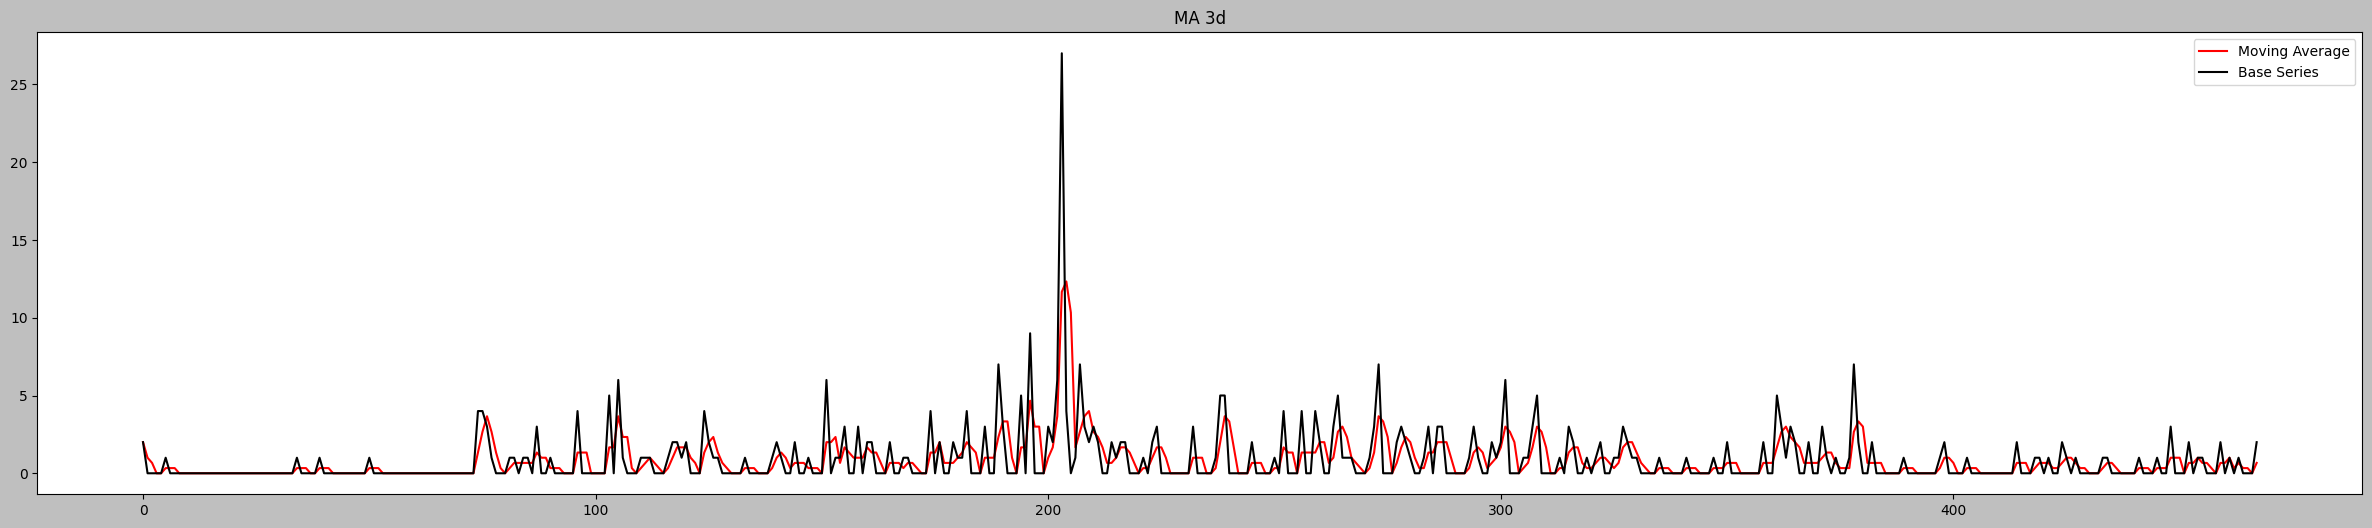

In [5]:
moving_average = series.rolling(window=3,min_periods=1)
moving_average = moving_average.mean()

graph.plot(moving_average, label='Moving Average',color='red')
graph.plot(series, label='Base Series')
graph.title('MA 3d')

graph.legend()
graph.show()


Decomposition

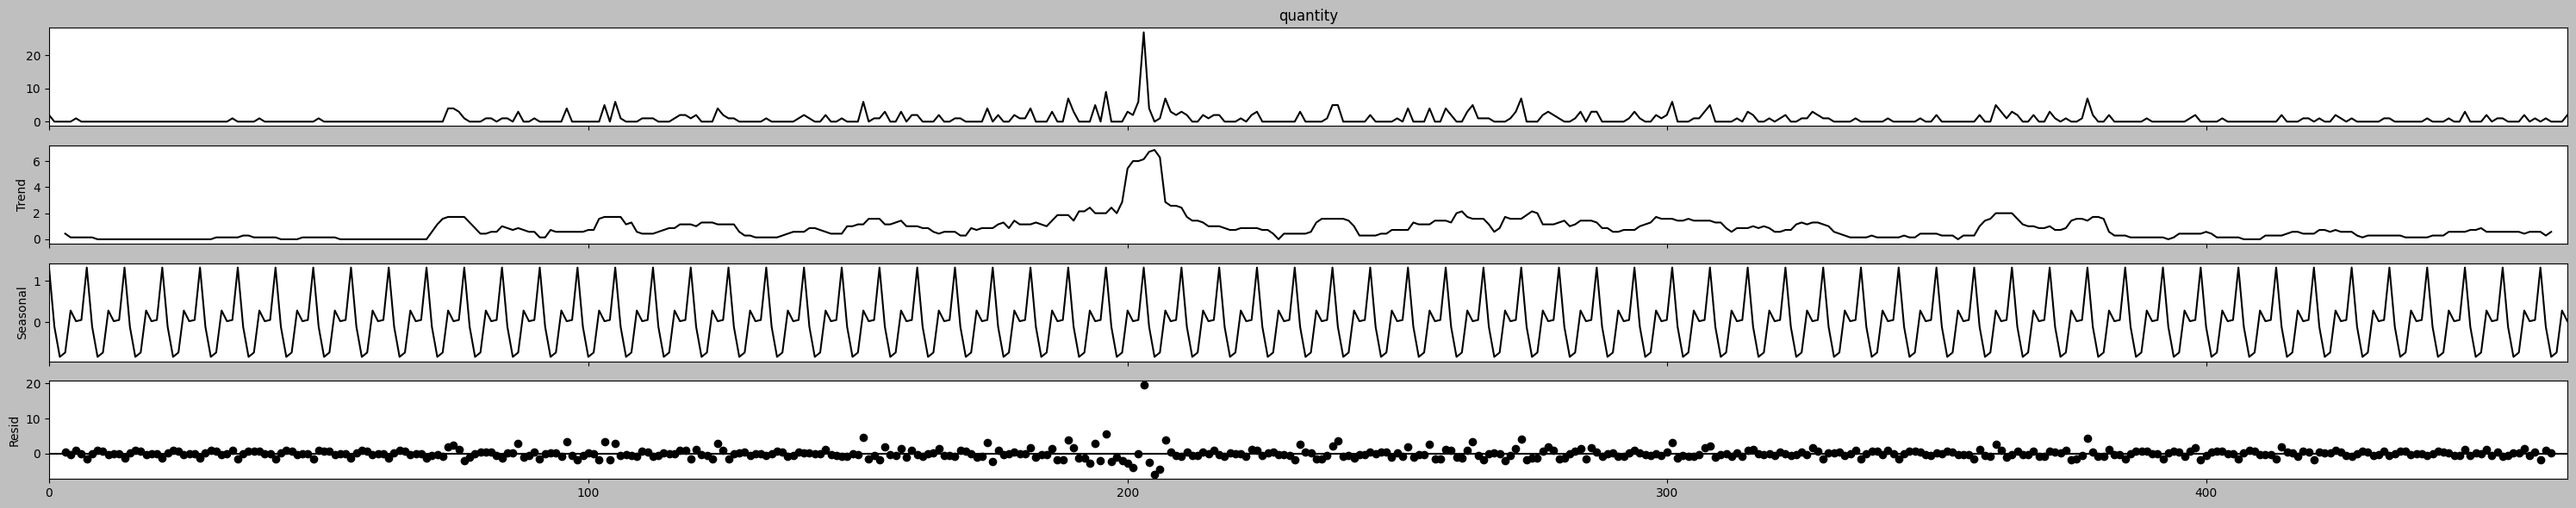

In [6]:
decomposition = seasonal_decompose(series, period=7)
decomposition.plot()
graph.show()

Check base series's normality

Test Stats: 0.4654529094696045
p-value: 4.491898540081086e-35
This is not a Normal Distribution


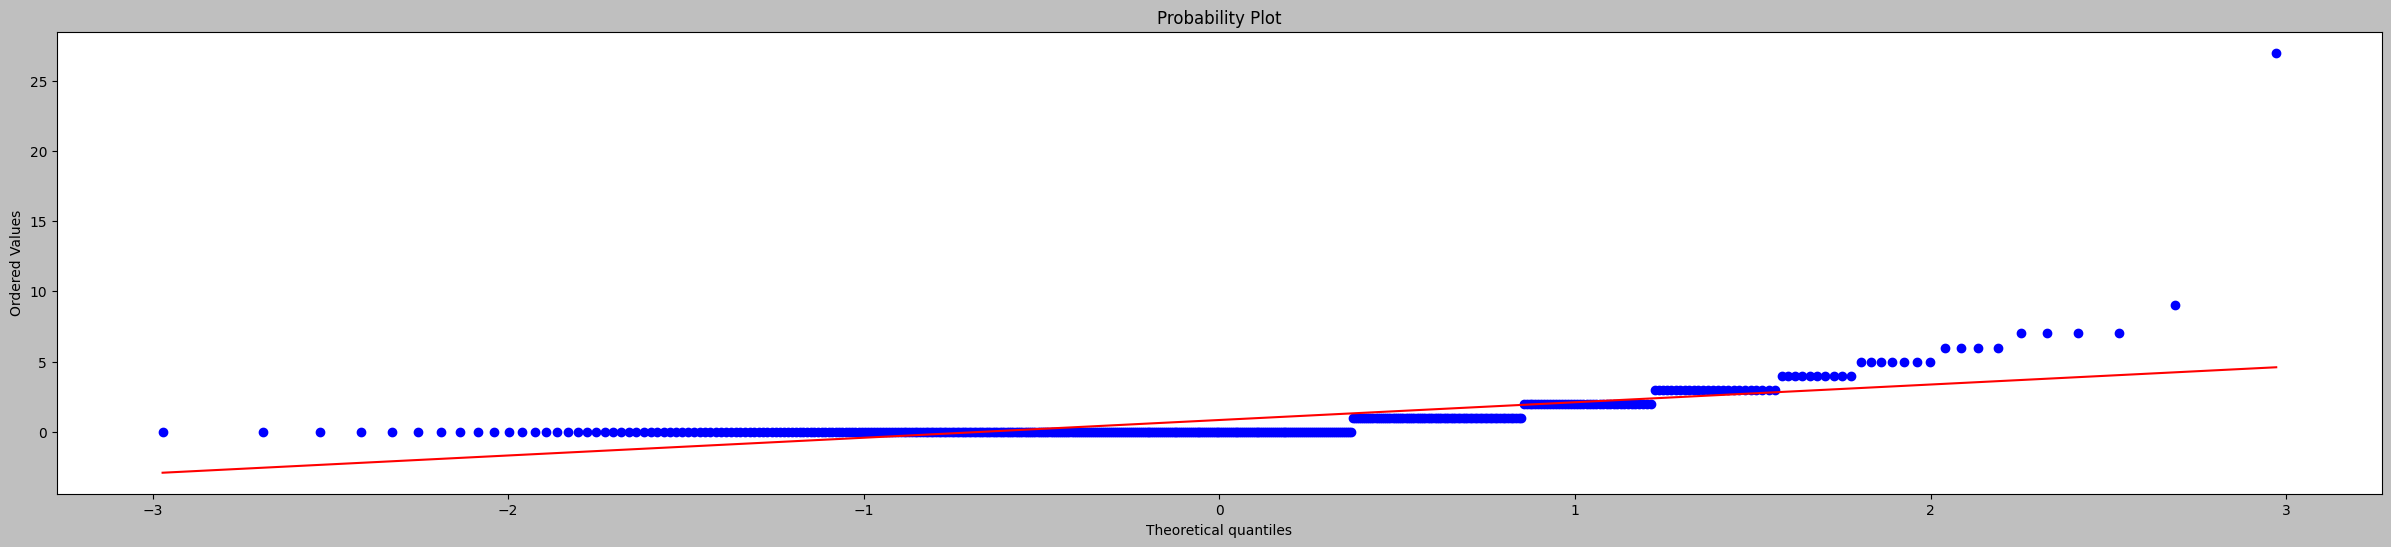

In [7]:
check_normal(series)

Normalization via:

Log

Test Stats: nan
p-value: 1.0
Normal Distribution
This is not a Normal Distribution


c:\Users\Aquila Mazzei\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Aquila Mazzei\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_morestats.py:1805: RuntimeWarning: invalid value encountered in subtract
  x = x - np.median(x)
c:\Users\Aquila Mazzei\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


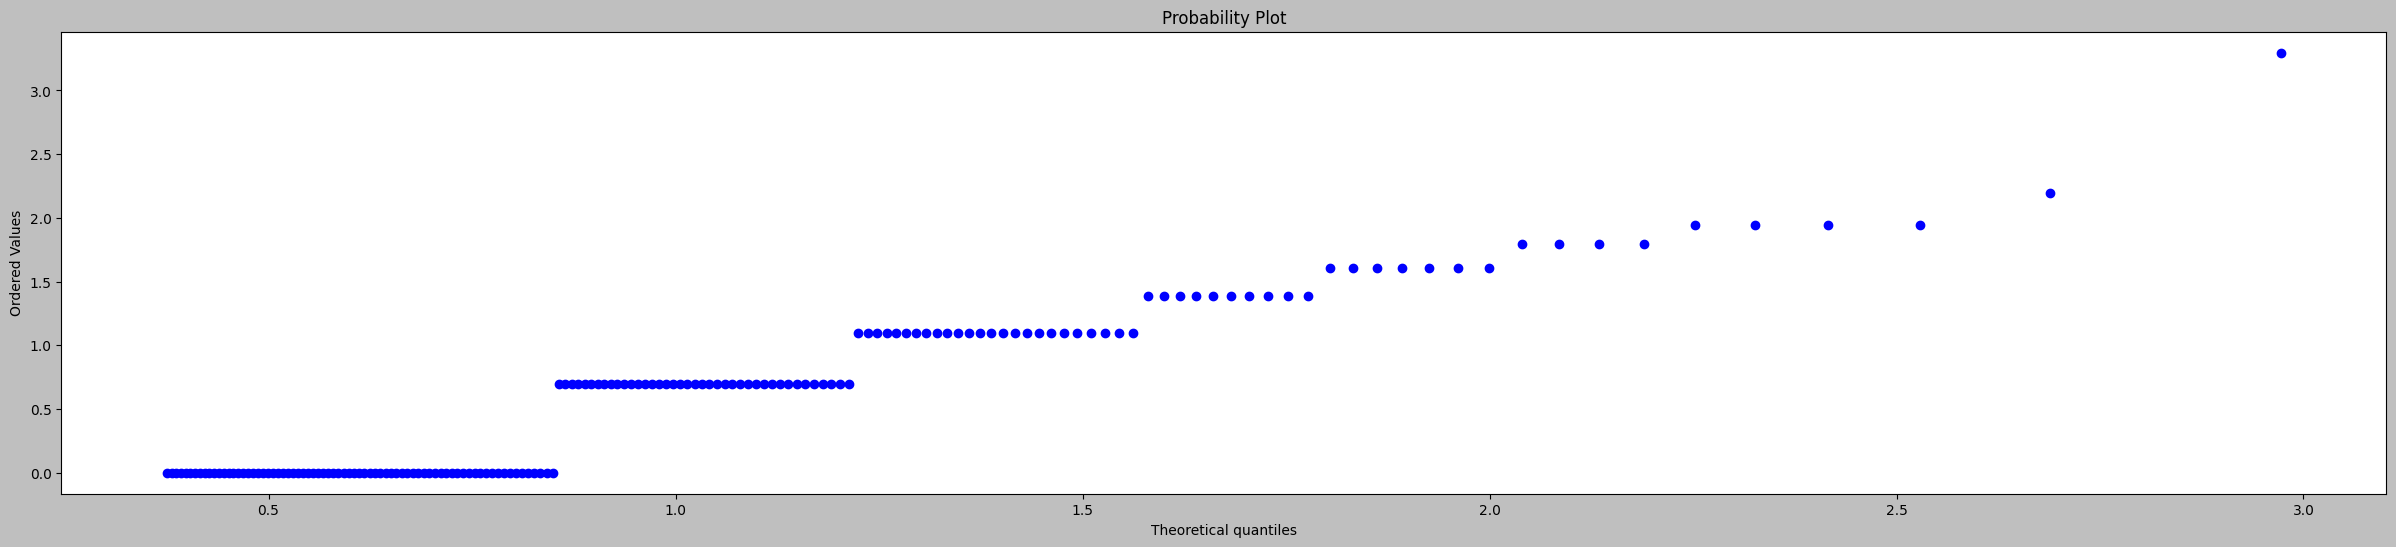

In [8]:
series_normal_attempt_1 = np.log(series)
check_normal(series_normal_attempt_1)

Cube Root

Test Stats: 0.6953654289245605
p-value: 3.2142319102127385e-28
This is not a Normal Distribution


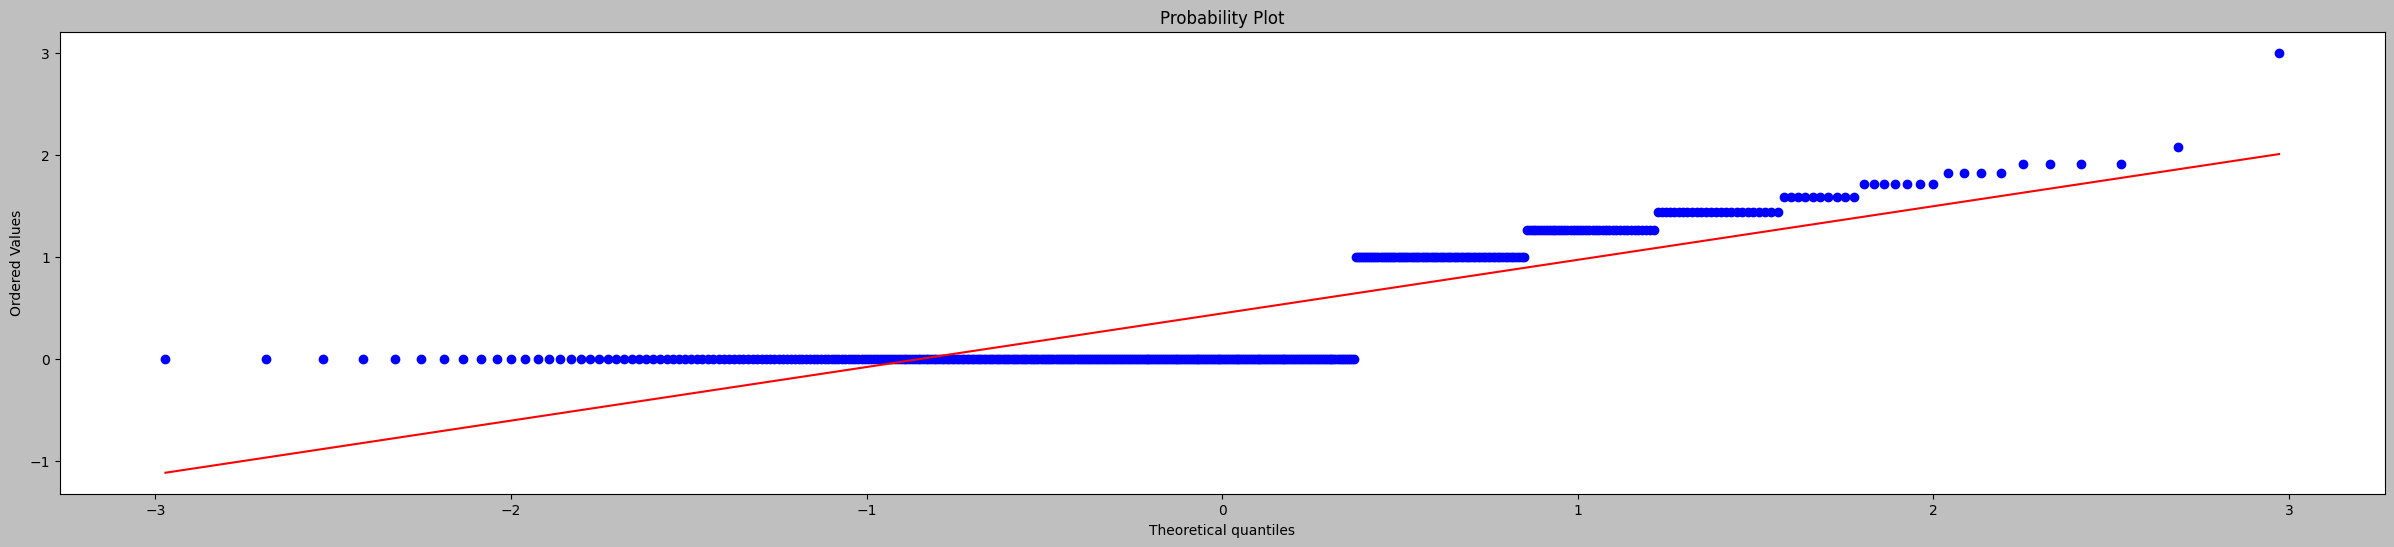

In [9]:
series_normal_attempt_2 = series ** (1/3)
check_normal(series_normal_attempt_2)

Min-Max Method

Test Stats: 0.4654529094696045


p-value: 4.491898540081086e-35
This is not a Normal Distribution


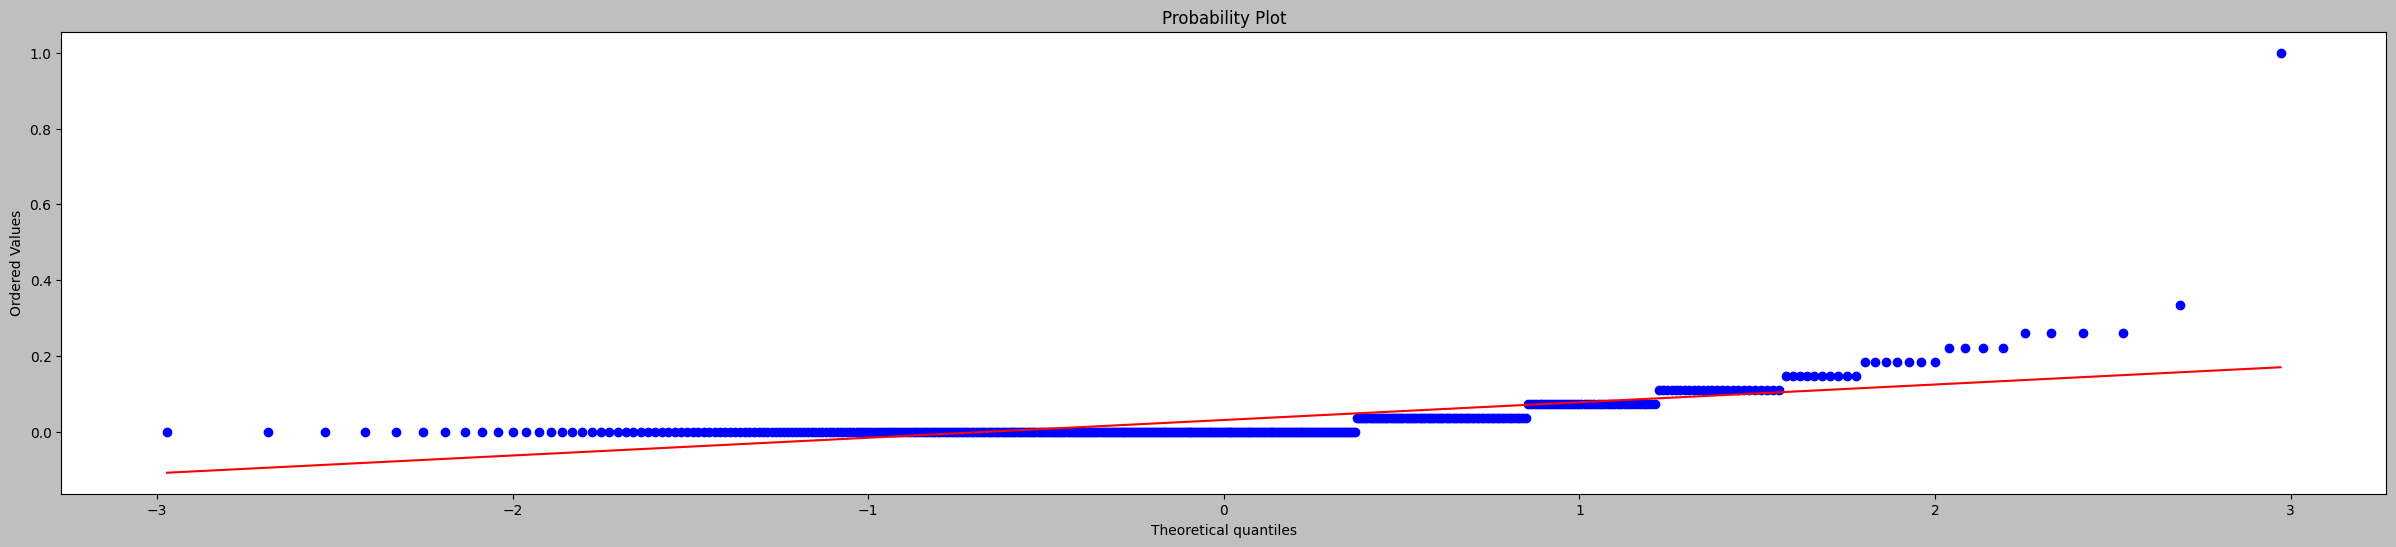

In [10]:
series_normal_attempt_3 = (series - series.min()) / (series.max() - series.min())
check_normal(series_normal_attempt_3)

Z-Score

Test Stats: 0.4654529094696045
p-value: 4.491898540081086e-35
This is not a Normal Distribution


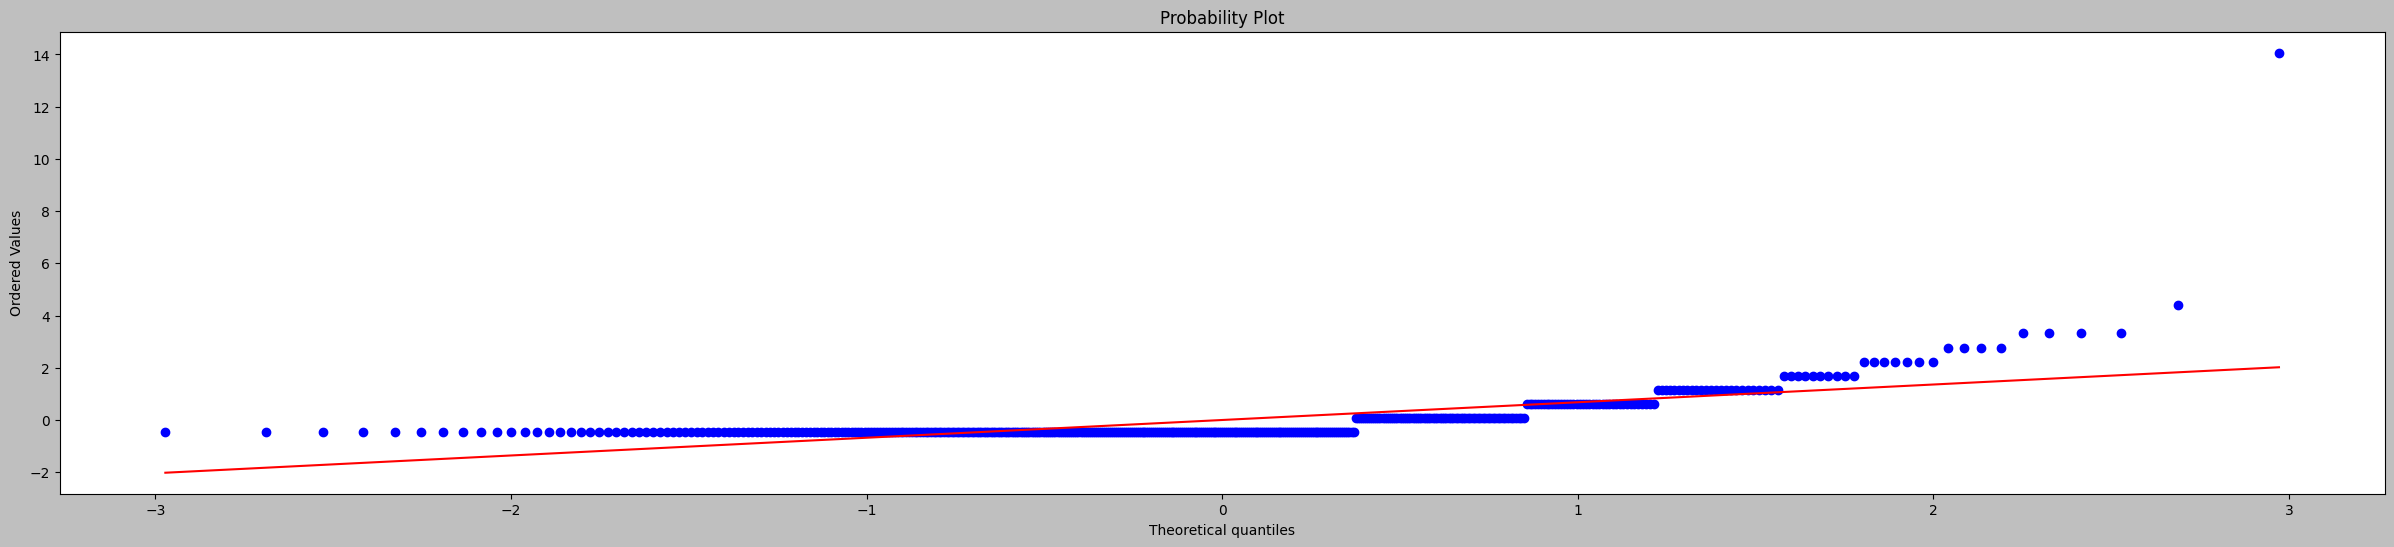

In [11]:
att_4_mean = series.mean()
std_4 = series.std()
series_normal_attempt_4 = (series - att_4_mean) / std_4
check_normal(series_normal_attempt_4)

KPSS (Kwiatkowski–Phillips–Schmidt–Shin) Test

In [12]:
kpss_ma = kpss_stat.kpss(moving_average)
kpss_base = kpss_stat.kpss(series)

best_series = moving_average

if kpss_base[1] < kpss_ma[1]: best_series = series 

def choose_series(serie):
    kpss = kpss_stat.kpss(serie)
    print('Test-Stat: {}'.format(kpss[0]))
    print('P-Value: {}'.format(kpss[1]))
    print('Critical Points: ')
    for key, value in kpss[3].items():
        print('{}: {}'.format(key, value))

    if kpss[1] < 0.05:
        print('NOT Est.')
    else:
        print('Est.')

choose_series(best_series)

Test-Stat: 0.49987809979417713
P-Value: 0.041694121667978125
Critical Points: 
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739
NOT Est.


Autocorrelation

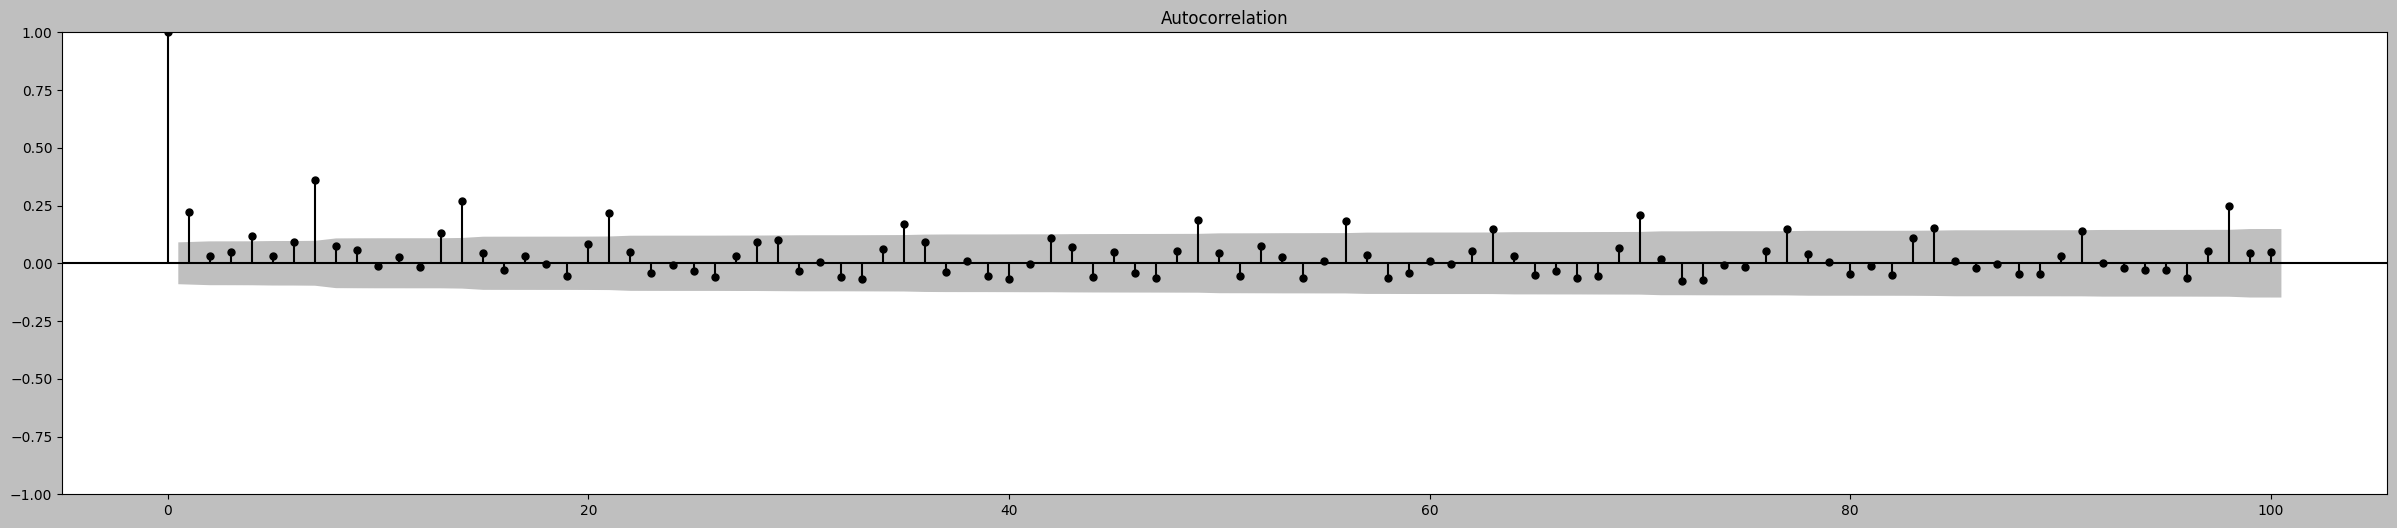

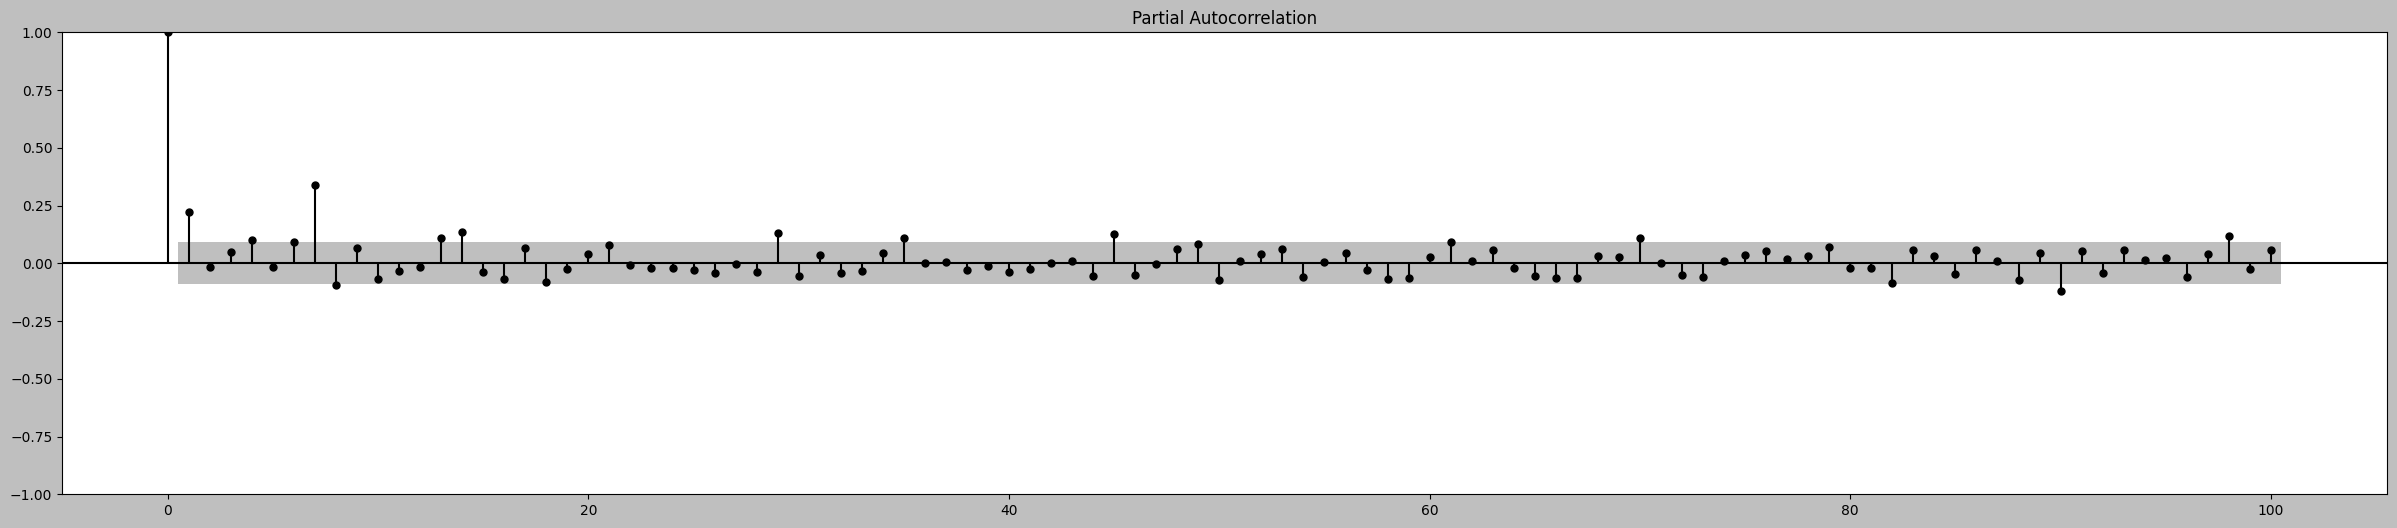

In [13]:
plot_acf(best_series, lags=100)
plot_pacf(best_series, lags=100)
graph.show()

In [14]:
auto_model = auto_arima(
    series,
    trace=True,
    stepwise=False,
    seasonal=True,
    stationary=False,
    max_p=5,
    max_q=5,
    max_P=5,
    max_Q=5,
    start_p=0,
    start_P=0,
    start_Q=0,
    m=12,
)


 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2116.133, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2111.798, Time=0.06 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=2112.910, Time=0.16 sec
 ARIMA(0,1,0)(0,0,3)[12] intercept   : AIC=2114.423, Time=0.64 sec
 ARIMA(0,1,0)(0,0,4)[12] intercept   : AIC=2116.382, Time=1.06 sec
 ARIMA(0,1,0)(0,0,5)[12] intercept   : AIC=2117.907, Time=2.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2111.387, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2113.266, Time=0.12 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=2114.496, Time=0.38 sec
 ARIMA(0,1,0)(1,0,3)[12] intercept   : AIC=2113.450, Time=1.73 sec
 ARIMA(0,1,0)(1,0,4)[12] intercept   : AIC=2115.407, Time=2.92 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=2113.178, Time=0.16 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=2114.695, Time=0.44 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=2116.121, Time=0.75 sec
 ARIMA(0,1,0)(2,0,3)[12] intercept   : AIC=inf, Time=3.36 sec


                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                  468
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -928.920
Date:                Thu, 09 Nov 2023   AIC                           1869.841
Time:                        12:59:31   BIC                           1894.719
Sample:                             0   HQIC                          1879.631
                                - 468                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9768      0.093    -10.559      0.000      -1.158      -0.795
ar.L2         -0.6338      0.098     -6.465      0.000      -0.826      -0.442
ma.L1          0.2088      0.084      2.488      0.0

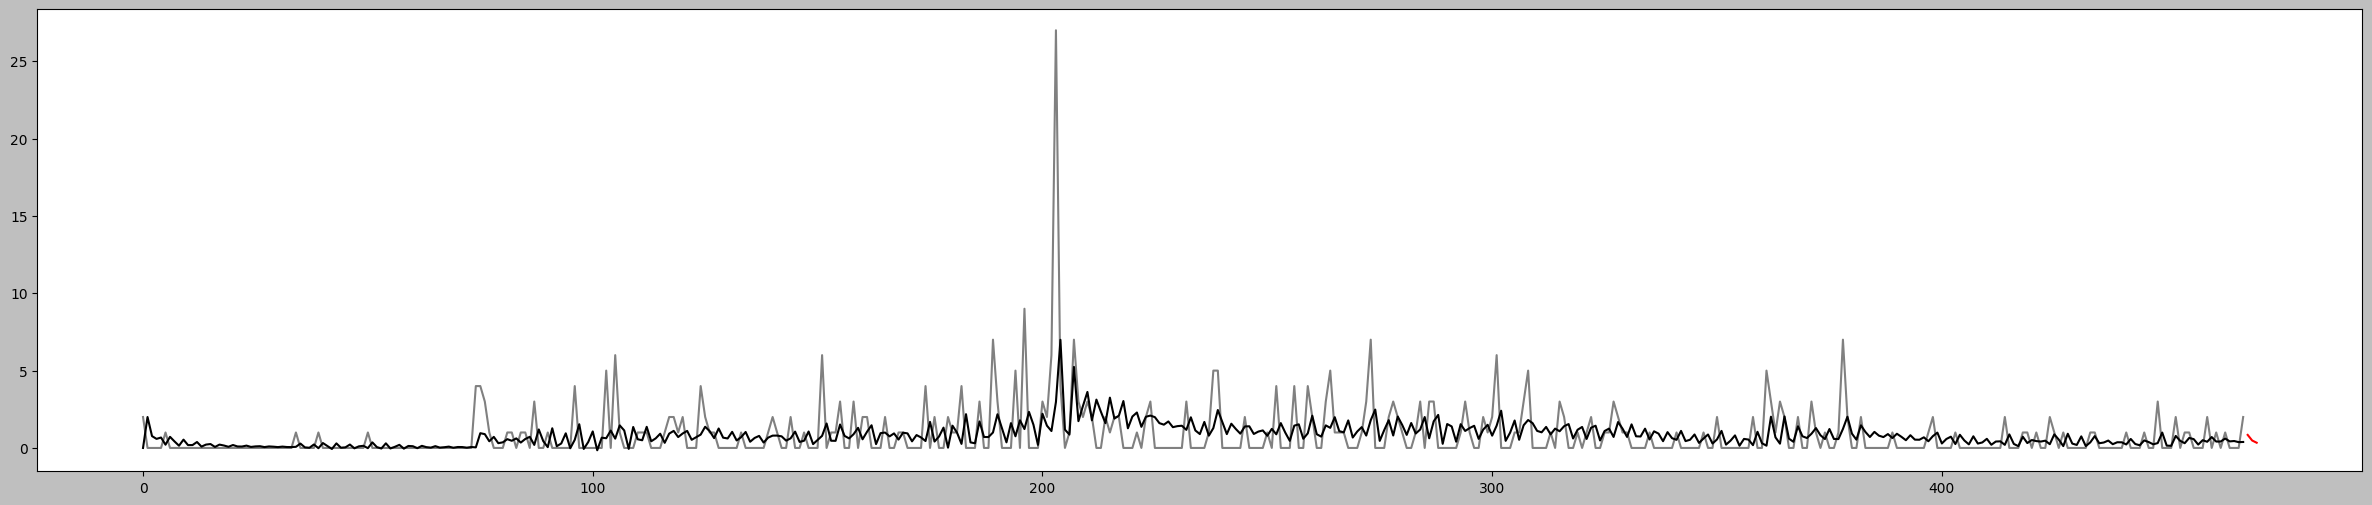

In [21]:
#Best model:  ARIMA(2,1,3)(0,0,0)[12] intercept
model = ARIMA(series, order=(2,1,3), seasonal_order=(0,0,0,12))

result = model.fit()

print(result.summary())
resid = result.resid
forecasting = result.forecast(3)
final = forecasting 
graph.plot(best_series, label='Real Series', color='gray')
graph.plot(best_series-resid, color='black', label='Resid')

graph.plot(forecasting, color='red')

print('Forecast: ' + str(final.sum()))